In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Importing the data

In [13]:
import os
for dirname, _, filenames in os.walk('/Users/anishsoni/Desktop/kaggle/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/anishsoni/Desktop/kaggle/images/.DS_Store
/Users/anishsoni/Desktop/kaggle/images/test/.DS_Store
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0107.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0111.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0110.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0106.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0101.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0117.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0116.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0120.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0119.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0115.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0103.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumonia/0102.jpeg
/Users/anishsoni/Desktop/kaggle/images/test/Viral Pneumon

## importing the dependencies

In [14]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Dropout,Conv2D,InputLayer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

## Import the train and test datasets

In [19]:
train_dir="/Users/anishsoni/Desktop/kaggle/images/train"
test_dir="/Users/anishsoni/Desktop/kaggle/images/test"

In [20]:
categories = ['Covid','Normal']
y_train = []
x_train = []
x_test = []
y_test = []
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 10

## Reading the Images from the Train Dataset

In [21]:
im = cv2.imread ('/Users/anishsoni/Desktop/kaggle/images/train/Covid/COVID-00013b.jpg')
h,w,c = im.shape
print(w)
print(h)
print(c)

1806
1375
3


In [22]:
for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_train.append(image)
        y_train.append(category)

In [23]:
x_train[0]

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.04313725, 0.04313725, 0.04313725],
        [0.05490196, 0.05490196, 0.05490196],
        [0.04313725, 0.04313725, 0.04313725]],

       [[0.05098039, 0.05098039, 0.05098039],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.03529412, 0.03529412, 0.03529412],
        [0.04705882, 0.04705882, 0.04705882]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.05490196, 0.05490196, 0.05490196],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03921569, 0.03921569],
        [0.05882353, 0.05882353, 0.05882353]],

       ...,

       [[0.38823529, 0.38823529, 0.38823529],
        [0.39607843, 0.39607843, 0.39607843],
        [0.40392157, 0

In [24]:
y_train[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

## Reading the Images from the Test Dataset

In [25]:
for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_test.append(image)
        y_test.append(category)

In [26]:
x_test[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [27]:
y_test[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

## Preprocessing The Data And Label

In [28]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train,num_classes=2)
y_test = lb.fit_transform(y_test)
y_test = to_categorical(y_test,num_classes=2)

In [29]:
x_train = np.array(x_train,dtype='float32')
y_train = np.array(y_train,dtype='float32')
x_test = np.array(x_test,dtype='float32')
y_test = np.array(y_test,dtype='float32')

## Creating the CNN Model

In [30]:
model = Sequential()
model.add(InputLayer(input_shape=(500,500,3)))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2,activation='softmax'))

## Compiling the Model

In [31]:
#Regularization
opt = Adam(learning_rate=INIT_LR,weight_decay=INIT_LR/Batch_Size)

In [32]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
validation_steps = len(y_test) // Batch_Size
History = model.fit(
    x_train,
    y_train,
    epochs=EPOCHES,
    steps_per_epoch=len(x_train)//Batch_Size,
    batch_size=Batch_Size,
    validation_steps=validation_steps
)

Epoch 1/10
5/5 [==============================] - 28s 5s/step - loss: 0.6104 - accuracy: 0.6375
Epoch 2/10
5/5 [==============================] - 22s 5s/step - loss: 0.3127 - accuracy: 0.8591
Epoch 3/10
5/5 [==============================] - 28s 5s/step - loss: 0.2775 - accuracy: 0.9060
Epoch 4/10
5/5 [==============================] - 23s 4s/step - loss: 0.1937 - accuracy: 0.9128
Epoch 5/10
5/5 [==============================] - 30s 5s/step - loss: 0.2018 - accuracy: 0.9128
Epoch 6/10
5/5 [==============================] - 33s 7s/step - loss: 0.1787 - accuracy: 0.9128
Epoch 7/10
5/5 [==============================] - 47s 9s/step - loss: 0.1392 - accuracy: 0.9500
Epoch 8/10
5/5 [==============================] - 26s 6s/step - loss: 0.1190 - accuracy: 0.9530
Epoch 9/10
5/5 [==============================] - 26s 5s/step - loss: 0.1006 - accuracy: 0.9664
Epoch 10/10
5/5 [==============================] - 24s 5s/step - loss: 0.1112 - accuracy: 0.9732


In [34]:
pred_result = model.predict(x_test,batch_size=Batch_Size)
pred_result = np.argmax(pred_result,axis=1)

2/2 [==============================] - 2s 523ms/step


In [35]:
print(f"Classification Report:\n {classification_report(y_test.argmax(axis=1),pred_result,target_names=lb.classes_)}")


Classifiation Report:
               precision    recall  f1-score   support

       Covid       1.00      0.88      0.94        26
      Normal       0.87      1.00      0.93        20

    accuracy                           0.93        46
   macro avg       0.93      0.94      0.93        46
weighted avg       0.94      0.93      0.94        46



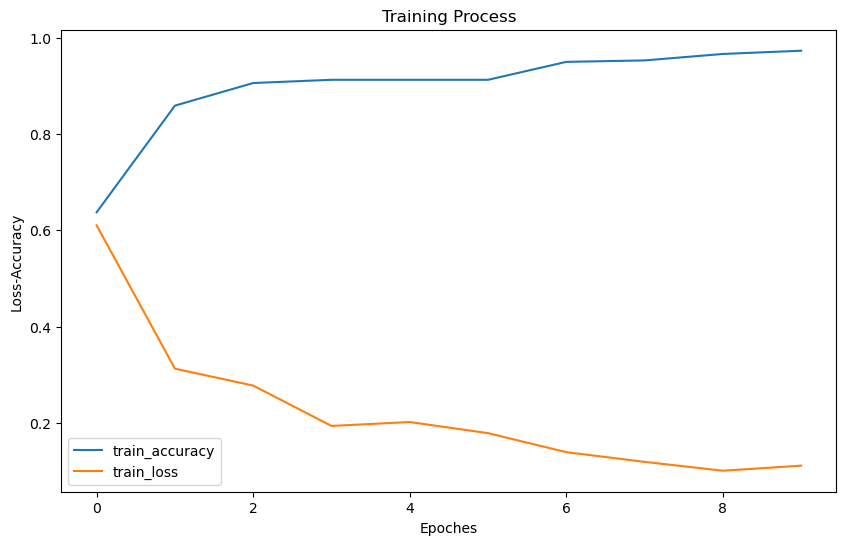

In [36]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,10),History.history['accuracy'],label='train_accuracy')
plt.plot(np.arange(0,10),History.history['loss'],label='train_loss')
plt.xlabel('Epoches')
plt.ylabel('Loss-Accuracy')
plt.title('Training Process')
plt.legend(loc='lower left')
plt.show()